In [2]:
import numpy as np
from numpy.random import randn
import pandas as pd

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
dataset= randn(25)

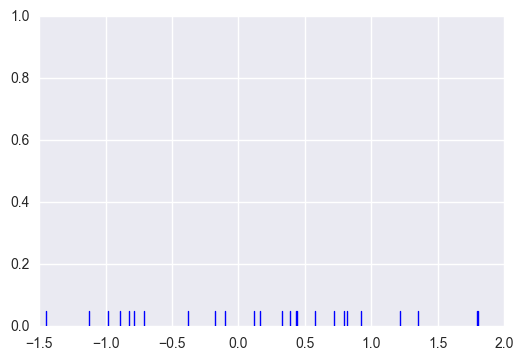

In [4]:
sns.rugplot(dataset)
#データがあるところに線を引く

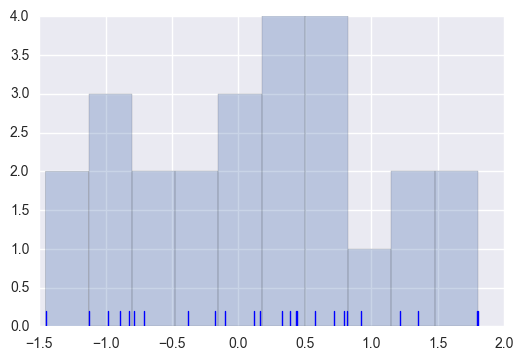

In [5]:
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

(0, 1)

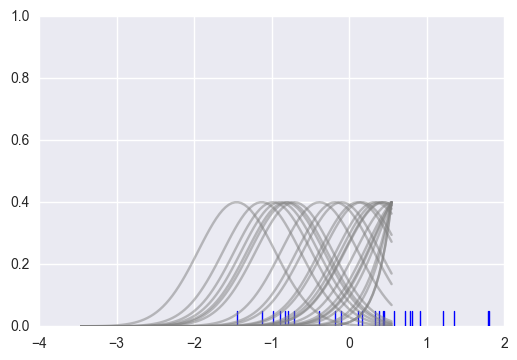

In [9]:
sns.rugplot(dataset)
x_min =dataset.min()-2
x_max=dataset.min()+2
x_axis=np.linspace(x_min,x_max,100)

bandwidth =((4*dataset.std()**5)/(3*len(dataset)))**0.2

kernel_list =[]
for data_point in dataset:
    kernel =stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    kernel=kernel/kernel.max()
    kernel=kernel*0.4
    plt.plot(x_axis,kernel,color='gray',alpha=0.5)
plt.ylim(0,1)

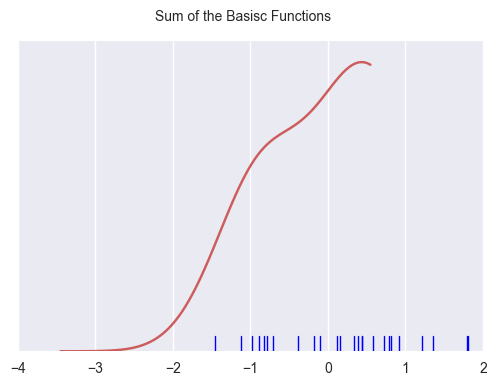

In [10]:
sum_of_kde =np.sum(kernel_list,axis=0)

fig=plt.plot(x_axis,sum_of_kde,color='indianred')
sns.rugplot(dataset)
plt.yticks([])
plt.suptitle('Sum of the Basisc Functions')

/Users/waka/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


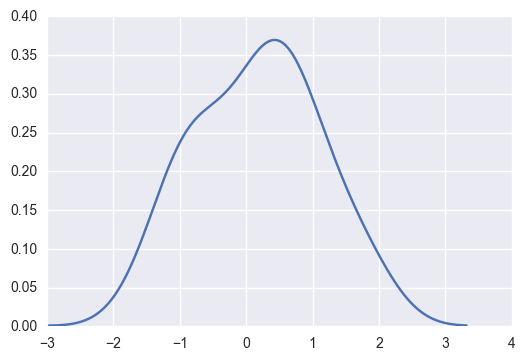

In [11]:
sns.kdeplot(dataset)

/Users/waka/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


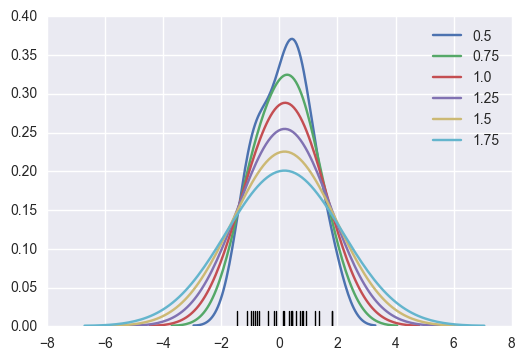

In [13]:
sns.rugplot(dataset,color='black')
for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset , bw=bw , label=bw)

/Users/waka/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)
/Users/waka/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


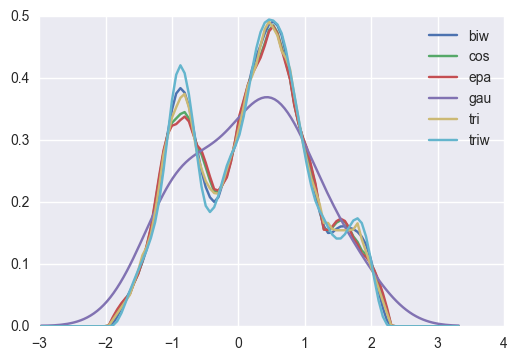

In [14]:
kernel_options=['biw','cos','epa','gau','tri','triw']
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern)

/Users/waka/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


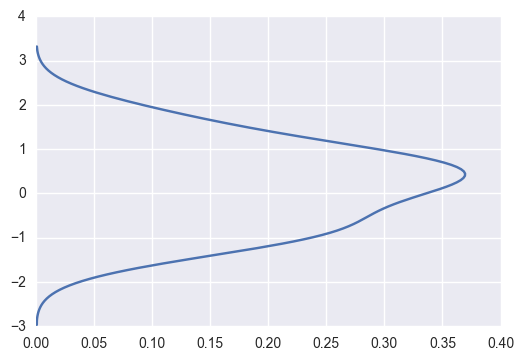

In [15]:
sns.kdeplot(dataset,vertical=True)

(array([  2.,   5.,   7.,   9.,  12.,  16.,  20.,  21.,  23.,  25.]),
 array([-1.45180513, -1.12642144, -0.80103775, -0.47565406, -0.15027036,
         0.17511333,  0.50049702,  0.82588072,  1.15126441,  1.4766481 ,
         1.8020318 ]),
 <a list of 10 Patch objects>)

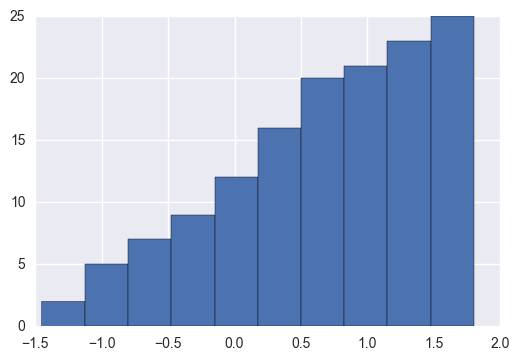

In [16]:
plt.hist(dataset,cumulative=True)

/Users/waka/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


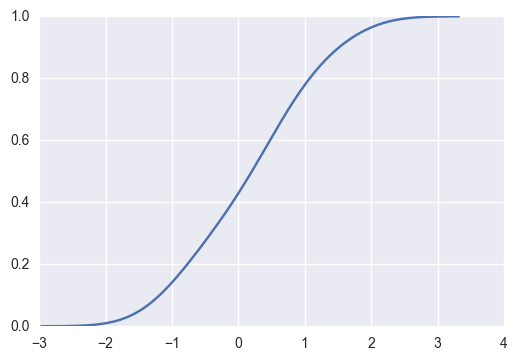

In [18]:
sns.kdeplot(dataset ,cumulative=True)

In [21]:
mean=[0,0]
cov=[[1,0],[0,100]]
dataset2=np.random.multivariate_normal(mean,cov,1000)

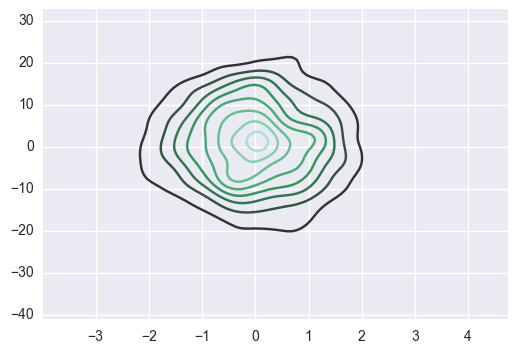

In [22]:
dframe=pd.DataFrame(dataset2,columns=['X','Y'])
sns.kdeplot(dframe)

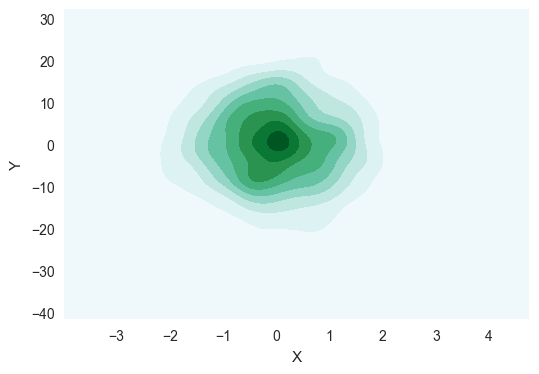

In [24]:
sns.kdeplot(dframe.X,dframe.Y,shade=True)

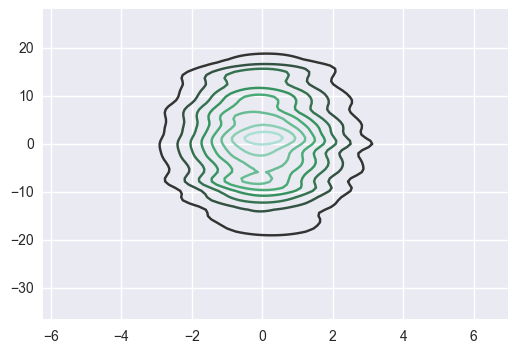

In [25]:
sns.kdeplot(dframe,bw=1)

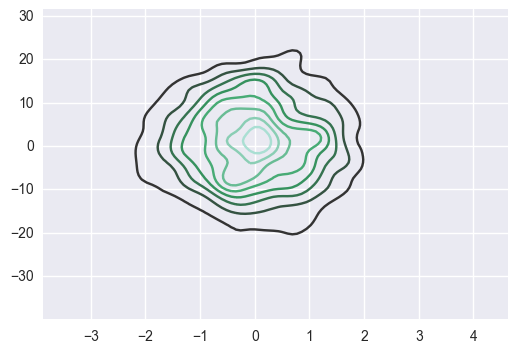

In [26]:
sns.kdeplot(dframe,bw='silverman')

/Users/waka/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


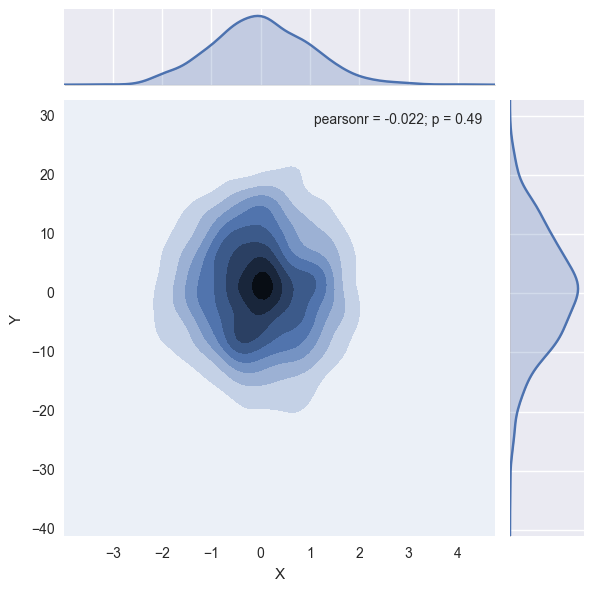

In [27]:
sns.jointplot('X','Y',dframe,kind='kde')

In [ ]:
#なめらかなヒストグラム